### Практическое задание к уроку 5 по теме “Элементы теории вероятностей”

#### Задание 1.  
*Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).*

In [1]:
import numpy as np

In [2]:
def spin_roulette():
    return np.random.randint(37)

In [3]:
spin_roulette()

19

#### Задание 2.
*1. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.*  
*2. Сгенерируйте десять выборок случайных чисел х0, …, х9.  
и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9.*

### 1.

Проверим теорему сложения на примере рулетки. Посчитаем вероятность выпадения числа, большего, либо равного 30-ти.  
Выпадение чисел в рулетке - события несовместные, поэтому для вычисления вероятности нашего события мы можем использовать  
сумму вероятностей того, что выпадет каждое, устраивающее нас число, в отдельности.  
Вероятность выпадения каждого числа, очевидно, 1/37. Т.к. нас устраивает 7 возможных исходов (числа от 30 до 36),  
то вероятность такого события должна быть равна 7/37≈0,189. Проверим это на практике.

In [4]:
# Немного модифицируем функцию выпадения поля в рулетке,  
# теперь она будет возращать набор из результатов выпадения.
# Количество выпадений будем задавать принудительно.

def spin_roulette(n):
    return np.random.randint(37, size=n)

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from pylab import rcParams

<u>Опыт будем проводить следующим образом:</u>  
Сначала мы повращаем рулетку 10 раз и найдём, сколько из этих  
10 раз у нас выпало число больше, либо равное 30. Разделим это количество  
на количество вращений рулетки и получим относительную частоту. Отметим  
эту точку на графике. Затем снова повращаем 10 раз и отметим точку. Так  
проделаем 50 раз и получим 50 точек с вероятностями выпадения нужных чисел  
при вращении рулетки 10 раз.  
<t>Далее будем вращать рулетку уже по 20 раз и аналогично подсчитывать относительную  
частоту, отмечая точки на графике. Через каждые 50 повторений опытов будем увеличивать  
число вращений рулетки, вплоть до миллиона вращений.  
Также на графике пунктирной линией нарисуем подсчитанную выше вероятность, равную 7/37.  
Это сумма, правильность подсчёта которой мы проверяем.

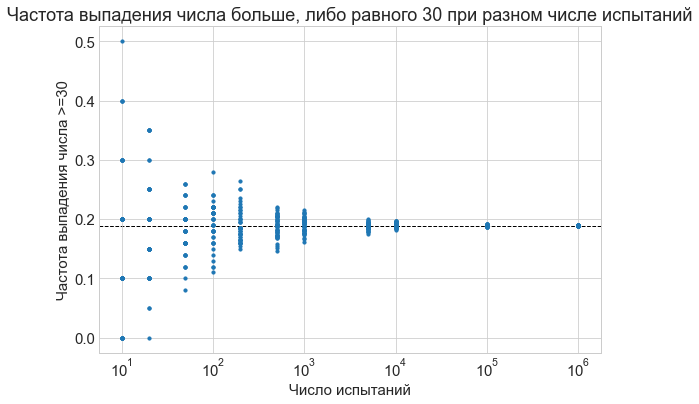

In [6]:
ns = [10, 20, 50, 100, 200, 500, 1000, 5000, 10**4, 10**5, 10**6]

x = []
y = []

for _ in range(50):
    for n in ns:
        x.append(n)
        y.append((spin_roulette(n) >= 30).sum() / n)

rcParams['figure.figsize'] = 9, 6
rcParams['font.size'] = 15
plt.style.use('seaborn-whitegrid')

plt.scatter(x, y, s=10)
plt.axhline(y=7/37, c='black', ls='dashed', lw=1).set_zorder(0)

plt.xscale('log')
plt.title('Частота выпадения числа больше, либо равного 30 при разном числе испытаний')
plt.xlabel('Число испытаний')
plt.ylabel('Частота выпадения числа >=30')

plt.show()

Как видно из графика, при увеличении числа вращений рулетки, наши  
относительные частоты стремятся к 7/37. При большом числе повторений  
можно считать, что мы получили статистическую вероятность события, которая  
оказалась равна вероятности, рассчитанной по теореме сложения.   
Будем считать теорему сложения вероятностей несовместных событий проверенной.

### 2.  
*Сгенерируйте десять выборок случайных чисел х0, …, х9.  
и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9.*

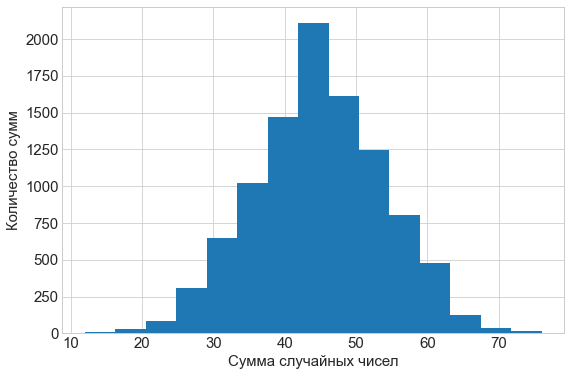

In [7]:
x = 0
for _ in range(10):
    x += np.random.randint(10, size=10000)
    
plt.hist(x, bins=15)
plt.xlabel('Сумма случайных чисел')
plt.ylabel('Количество сумм')
plt.show()

#### Задание 3.  
*1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение)  
и сравните результаты.*  
*2. Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.*

### 1.

Дан код. Здесь методом Монте-Карло имитируется ситуация, где мы подбрасываем  
4 монетки n раз и фиксируем события, когда на 2 монетках из 4 выпадает орёл (решка).  
Затем мы делим количество успехов на количество подбрасываний монеток для расчёта  
вероятности такого события.

In [8]:
k, n = 0, 10000

a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
k += sum(x[i] == 2 for i in range(n))
k / n

0.3812

Формула Бернулли:  
### $`P_n(k) = C_n^kp^kq^{n-k}`$  
При p=q, как в нашем случае:   
### $`P_n(k) = C_n^k\cdot\dfrac{1}{2^n}`$  
Формула расчета количества сочетаний:
### $`C_n^k = \dfrac{n!}{k!(n-k)!}`$  
В нашем случае:  
### $`C_4^2 = \dfrac{4!}{2!(4-2)!} = \dfrac{24}{4} = 6`$

Тогда:  
### $P_4(2) = C_4^2\cdot\dfrac{1}{2^4} = 6 \cdot \dfrac{1}{16} = \dfrac{6}{16} = 0.375$

Таким образом, в коде, представленном выше, вероятность события будет стремиться к числу 0,375  
при увеличении числа опытов.

### 2.  
*Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n  
независимых испытаний, взяв другие значения n и k.*

Рассчитаем вероятность того, что из 10 вращений рулетки, ровно 2 раза выпадет "зеро".  
Здесь p≠q, а именно:  
p = 1/37 - вероятность выпадения "зеро";
q = 36/37 - вероятность невыпадения "зеро".

Тогда:  
### $P_{10}(2) = C_{10}^2p^2q^{10-2}$  

In [9]:
def combinations(k, n):
    return (np.math.factorial(n)) / (np.math.factorial(k) * np.math.factorial(n-k))

In [10]:
c = combinations(2, 10)
c

45.0

Искомая вероятность будет равна:

In [11]:
c * (1/37)**2 * (36/37)**8

0.026400690099919615

Или примерно 2,64%

#### Задание 4. 
*Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k*

Функция для расчета сочетаний обозначена в предыдущем задании, напишем функции  
для расчета перестановок и размещений.

In [12]:
def permutations(n):
    return np.math.factorial(n)

def arrangements(k, n):
    return np.math.factorial(n) / np.math.factorial(n-k)

Сколькими вариантами последовательностей можно забить 15 шаров в бильярде?

In [13]:
permutations(15)

1307674368000

Сколькими вариантами можно забить 5 шаров, причём если важен  
порядок, в каком шары забиваются?

In [14]:
arrangements(5, 15)

360360.0

А если порядок не важен?

In [15]:
combinations(5, 15)

3003.0

#### Задание 5.  
Дополните код расчетом коэффициента корреляции x и y по формуле  
#### $R = \dfrac{\sum(x_i-x_m)(y_i-y_m)}{\sqrt{\sum(x_i-x_m)^2\sum(y_i-y_m)^2}}$

Из кода урока возьмём только нужные нам *x* и *y*:

In [16]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)

Коэффициент корреляции будет равен:

In [17]:
R = sum((x - np.mean(x)) * (y - np.mean(y))) / (np.sqrt(sum((x - np.mean(x))**2) * sum((y - np.mean(y))**2)))
R

0.9266557164828384

Проверим посчитанное значение:

In [18]:
np.corrcoef(x, y)[0][1]

0.9266557164828386

Расчёт выполнен верно.